In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split

import cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Add, Concatenate, GlobalAveragePooling2D

from PIL import Image
import requests
from io import BytesIO

In [2]:
path = "C:/Users/asrya/OneDrive/Desktop/Ed/Python/Deep_Learning/Data/"

In [3]:
h, w = 224, 224

images = []
x = []
y = []
d_class = {}

for i, f_name in enumerate(os.listdir(path)):
    d_class[i] = f_name
    for img_name in (os.listdir(path + f_name)):
        y.append(i)
        img = cv2.imread(path + f_name + "/" + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (h, w))
        img_p = tf.keras.applications.resnet.preprocess_input(img)
        x.append(img_p)
        images.append(img)

images = np.array(images)
x = np.array(x)
y = np.array(y)

print(d_class)
images.shape, x.shape, y.shape

{0: 'capitan_america', 1: 'Ironman', 2: 'spiderman', 3: 'thor', 4: 'winter soldier'}


((155, 224, 224, 3), (155, 224, 224, 3), (155,))

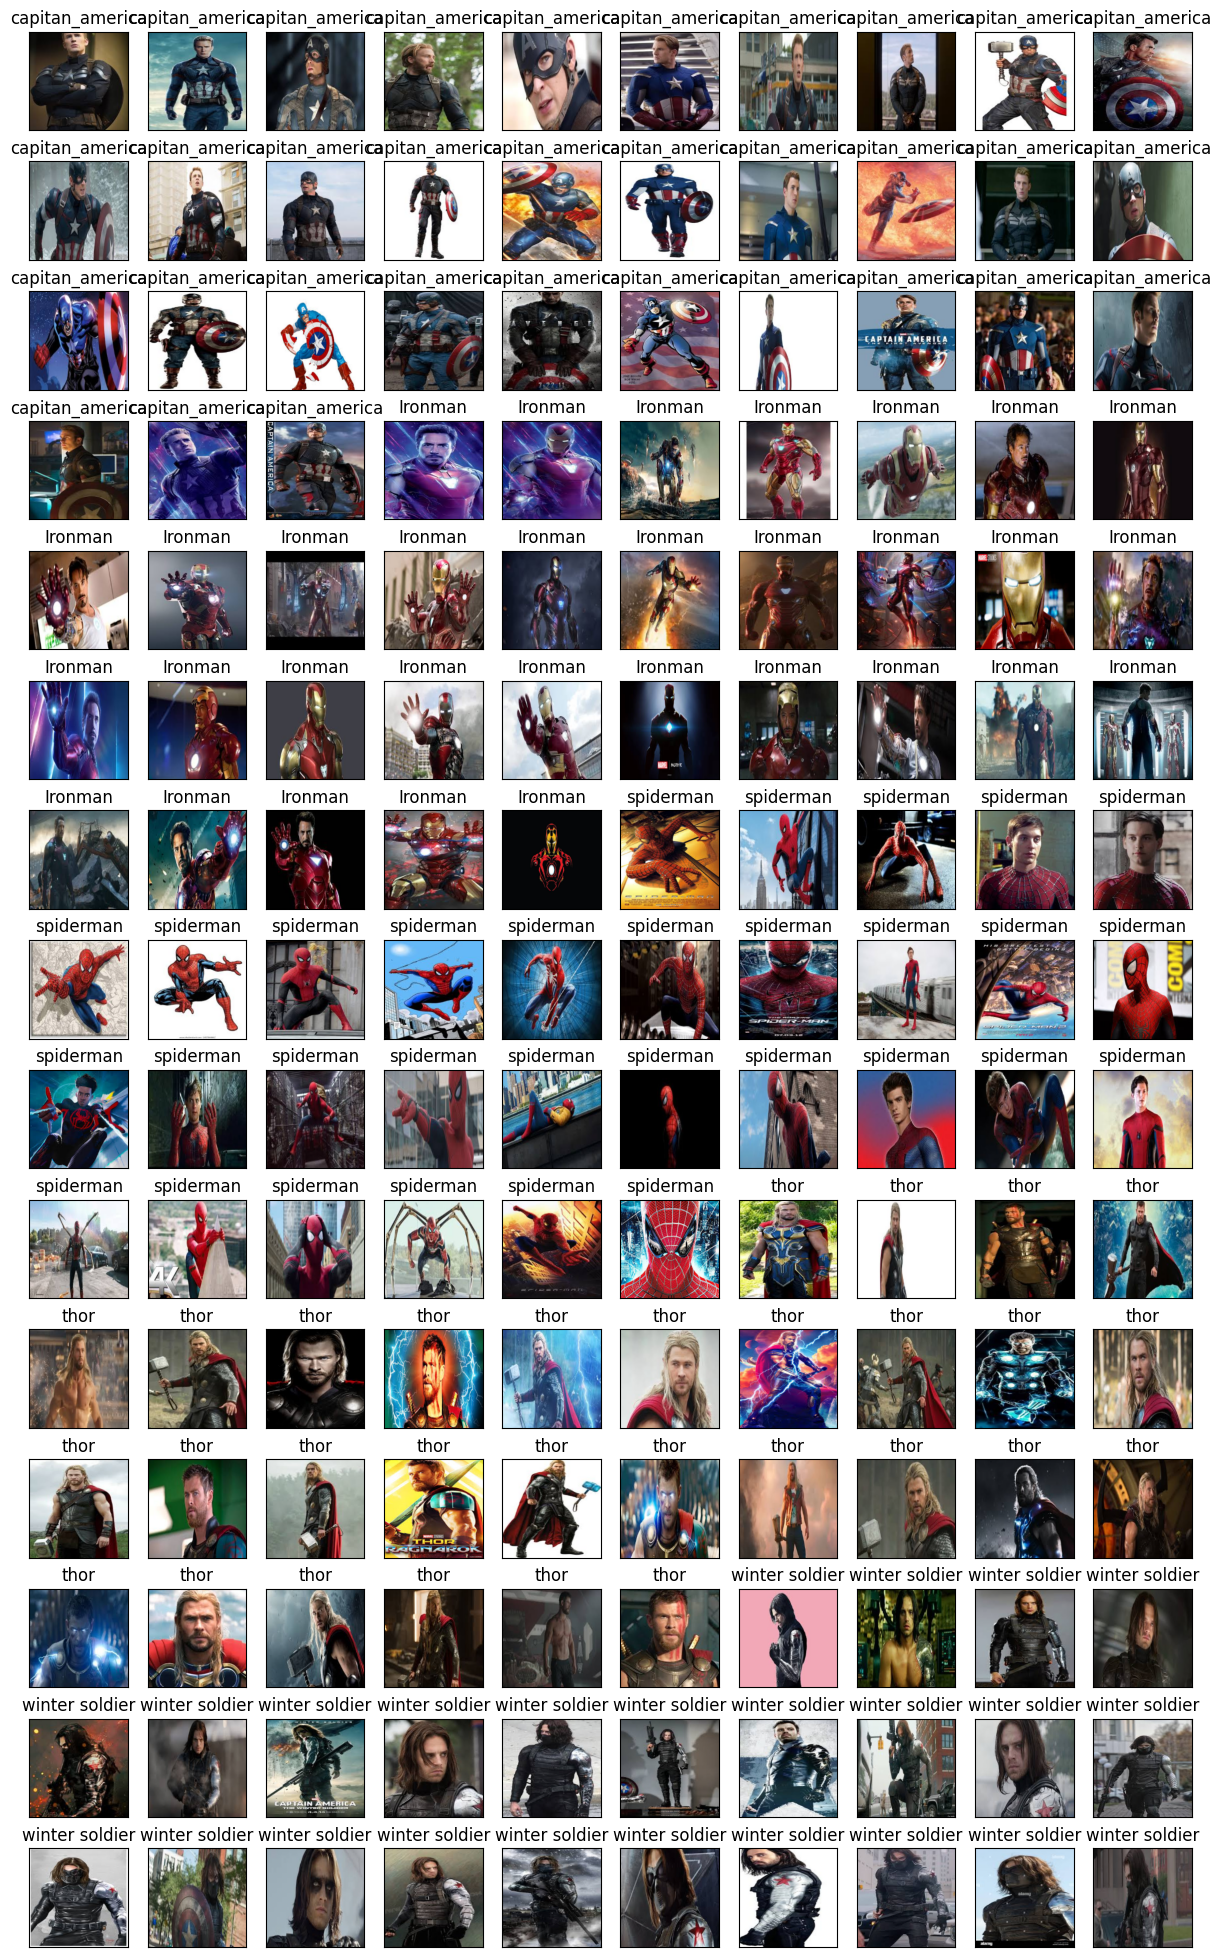

In [4]:
plt.figure(figsize=(15, 25))
for i in range(150):
    plt.subplot(15, 10, i + 1)
    # ind = np.random.randint(0, 149)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(d_class[y[i]])

In [5]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [7]:
resnet = tf.keras.applications.ResNet152(include_top=False)

In [8]:
for i in resnet.layers:
    i.trainable = False

In [40]:
inp = Input(shape=x_train.shape[1:])
m = resnet(inp)
g = GlobalAveragePooling2D()(m)
d_0 = Dense(300, activation="relu")(g)
d = Dense(150, activation="relu")(d_0)
out = Dense(5, activation="softmax")(d)

model = tf.keras.Model(inp, out)
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet152 (Functional)               │ (None, 7, 7, 2048)          │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 300)                 │         614,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 5)                   │             755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,031,549 (225.19 MB)

 Trainable params: 660,605 (2.52 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [41]:
model.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=10, epochs=3, validation_data=(x_test, y_test_cat))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.3092 - loss: 2.2401 - val_accuracy: 0.5484 - val_loss: 1.0237
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8559 - loss: 0.4899 - val_accuracy: 0.7097 - val_loss: 0.9544
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9754 - loss: 0.1125 - val_accuracy: 0.7742 - val_loss: 0.9620
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 0.7419 - val_loss: 0.9164
Epoch 5/5
 9/13 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0133 

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
capitan_america - 0.002
winter soldier - 0.0069
Ironman - 0.9902


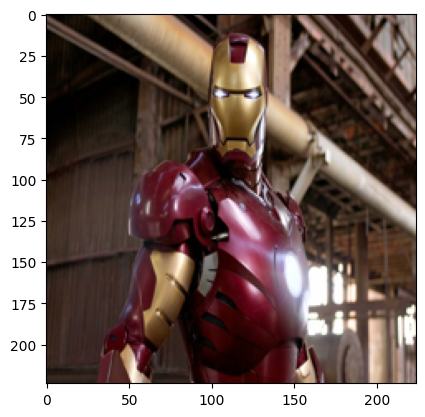

In [136]:
response = requests.get("https://cdn.britannica.com/49/182849-050-4C7FE34F/scene-Iron-Man.jpg")
img = Image.open(BytesIO(response.content))

img = img.resize((w, h)).convert("RGB")
img = np.array(img)
plt.imshow(img)
print(img.shape)

img = tf.keras.applications.resnet.preprocess_input(img)
img = np.expand_dims(img, axis = 0)
p = model.predict(img)
p_ind = p.argsort()[0][-3:]
p_val = p[0][p_ind]
for i, j in zip(p_ind, p_val):
    print(d_class[i], "-", round(j, 4))

In [143]:
h_inc, w_inc = 299, 299

In [163]:
images = []
x = []
y = []
d_class = {}

for i, f_name in enumerate(os.listdir(path)):
    d_class[i] = f_name
    for img_name in (os.listdir(path + f_name)):
        y.append(i)
        img = cv2.imread(path + f_name + "/" + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img_p = tf.keras.applications.resnet.preprocess_input(img)
        x.append(img_p)
        images.append(img)

images = np.array(images)
x = np.array(x)
y = np.array(y)

print(d_class)
images.shape, x.shape, y.shape

{0: 'capitan_america', 1: 'Ironman', 2: 'spiderman', 3: 'thor', 4: 'winter soldier'}


((155, 224, 224, 3), (155, 224, 224, 3), (155,))

In [189]:
for i in x:
    i = tf.keras.applications.inception_v3.preprocess_input(i)
    

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [191]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [192]:
inc = tf.keras.applications.inception_v3

In [193]:
for i in inc.layers:
    i.trainable = False

AttributeError: module 'tensorflow.keras.applications.inception_v3' has no attribute 'layers'

In [ ]:
inp = Input(shape=x_train.shape[1:])
inp = Input(shape=(224, 224, 3))
m = inc(inp)
g = GlobalAveragePooling2D()(m)
d = Dense(150, activation="relu")(g)
out = Dense(5, activation="softmax")(d)

model1 = tf.keras.Model(inp, out)
model1.summary()

In [ ]:
model.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train_cat, batch_size=500, epochs=4, validation_data=(x_test, y_test_cat))